<a href="https://colab.research.google.com/github/josh-lamey/EDA/blob/main/Exploring_Meteorite_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
import math

#magic command to view plots within environment
%matplotlib inline

In [ ]:
meteorites = pd.read_csv("/content/gdrive/My Drive/DataScience/meteoritessize.csv")

In [ ]:
# Displaying the first 5 rows
meteorites.head()

,place,type_of_meteorite,mass_g,fell_found,year,database,coordinate_1,coordinates_2,cartodb_id,created_at,updated_at,the_geom,year_date
0,Ur,Iron,0.00,Found,-2500.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,30.90000,46.01667,34242,2013-02-15 20:56:02.826333,2013-02-15 21:04:45.399478,0101000020E61000008369183E220247406666666666E6...,NaN
1,A-881561,H4,836.87,Found,1988.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.00000,26.00000,4141,2013-02-15 20:56:02.826333,2013-02-15 21:11:51.900085,0101000020E61000000000000000003A40000000000000...,1988-01-01 00:00:00
2,Wietrzno-Bobrka,Iron,376.00,Found,-600.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,49.41667,21.70000,6037,2013-02-15 20:56:02.826333,2013-02-15 21:04:45.399478,0101000020E61000003333333333B33540B79C4B7155B5...,NaN
3,A-881448,H4,341.27,Found,1988.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.00000,26.00000,6340,2013-02-15 20:56:02.826333,2013-02-15 21:11:51.900085,0101000020E61000000000000000003A40000000000000...,1988-01-01 00:00:00
4,A-881813,L6,296.96,Found,1988.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.00000,26.00000,6753,2013-02-15 20:56:02.826333,2013-02-15 21:11:51.900085,0101000020E61000000000000000003A40000000000000...,1988-01-01 00:00:00


In [ ]:
# Displaying the first 5 rows
meteorites.head()

,place,type_of_meteorite,mass_g,fell_found,year,database,coordinate_1,coordinates_2,cartodb_id,created_at,updated_at,the_geom,year_date
0,Ur,Iron,0.00,Found,-2500.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,30.90000,46.01667,34242,2013-02-15 20:56:02.826333,2013-02-15 21:04:45.399478,0101000020E61000008369183E220247406666666666E6...,NaN
1,A-881561,H4,836.87,Found,1988.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.00000,26.00000,4141,2013-02-15 20:56:02.826333,2013-02-15 21:11:51.900085,0101000020E61000000000000000003A40000000000000...,1988-01-01 00:00:00
2,Wietrzno-Bobrka,Iron,376.00,Found,-600.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,49.41667,21.70000,6037,2013-02-15 20:56:02.826333,2013-02-15 21:04:45.399478,0101000020E61000003333333333B33540B79C4B7155B5...,NaN
3,A-881448,H4,341.27,Found,1988.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.00000,26.00000,6340,2013-02-15 20:56:02.826333,2013-02-15 21:11:51.900085,0101000020E61000000000000000003A40000000000000...,1988-01-01 00:00:00
4,A-881813,L6,296.96,Found,1988.0,http://www.lpi.usra.edu/meteor/metbull.php?cod...,-72.00000,26.00000,6753,2013-02-15 20:56:02.826333,2013-02-15 21:11:51.900085,0101000020E61000000000000000003A40000000000000...,1988-01-01 00:00:00


In [ ]:
meteorites.columns  #column names

Index(['place', 'type_of_meteorite', 'mass_g', 'fell_found', 'year',
       'database', 'coordinate_1', 'coordinates_2', 'cartodb_id', 'created_at',
       'updated_at', 'the_geom', 'year_date'],
      dtype='object')

In [ ]:
meteorites.shape # how many rows, columns

(34513, 13)

In [ ]:
meteorites.nunique(axis=0) # number of unique values for each variable

place                34513
type_of_meteorite      398
mass_g               10471
fell_found             155
year                   316
database             34513
coordinate_1         12972
coordinates_2        14953
cartodb_id           34513
created_at               1
updated_at               3
the_geom             17527
year_date              312
dtype: int64

In [ ]:
meteorites.dtypes # what type of data is each

place                 object
type_of_meteorite     object
mass_g               float64
fell_found            object
year                 float64
database              object
coordinate_1         float64
coordinates_2        float64
cartodb_id             int64
created_at            object
updated_at            object
the_geom              object
year_date             object
dtype: object

In [ ]:
meteorites.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))) # count, mean, standard deviation, min, and max for numeric variables, then format each row to the regular format and suppresses scientific notation

,mass_g,year,coordinate_1,coordinates_2,cartodb_id
count,34513.000000,34166.000000,34513.000000,34513.000000,34513.000000
mean,16861.825502,1985.247410,-47.006794,69.789807,17257.000000
std,660031.138864,49.058956,46.880516,81.833069,9963.189257
min,0.000000,-2500.000000,-87.366670,-165.433330,1.000000
25%,5.100000,1981.000000,-76.843010,26.000000,8629.000000
50%,24.190000,1990.000000,-72.000000,54.884170,17257.000000
75%,170.690000,2000.000000,18.343670,158.779380,25885.000000
max,60000000.000000,2012.000000,81.166670,354.473330,34513.000000


In [ ]:
#craete a dataframe of the mass so we can run math on it
df1 = pd.DataFrame(meteorites,columns=['mass_g'])
print(df1)

       mass_g
0        0.00
1      836.87
2      376.00
3      341.27
4      296.96
...       ...
34508    0.00
34509    0.00
34510    0.00
34511    0.00
34512    0.00

[34513 rows x 1 columns]


In [ ]:
df1['logmass_g'] = df1['mass_g'].replace(-0,np.NaN)  #created a dataframe, replacing all 0 values with "NaN"
print(df1)


       mass_g  logmass_g
0        0.00        NaN
1      836.87     836.87
2      376.00     376.00
3      341.27     341.27
4      296.96     296.96
...       ...        ...
34508    0.00        NaN
34509    0.00        NaN
34510    0.00        NaN
34511    0.00        NaN
34512    0.00        NaN

[34513 rows x 2 columns]


In [ ]:
df1['finalogmass_g'] = np.log10(df1['logmass_g'])  #taking the log10 of the previous dataframe, essentially adding a column and calling the new object a new dataframe name
print(df1)

       mass_g  logmass_g  finalogmass_g
0        0.00        NaN            NaN
1      836.87     836.87       2.922658
2      376.00     376.00       2.575188
3      341.27     341.27       2.533098
4      296.96     296.96       2.472698
...       ...        ...            ...
34508    0.00        NaN            NaN
34509    0.00        NaN            NaN
34510    0.00        NaN            NaN
34511    0.00        NaN            NaN
34512    0.00        NaN            NaN

[34513 rows x 3 columns]


In [ ]:
df1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))  # checking the max and min values

,mass_g,logmass_g,finalogmass_g
count,34513.000000,34065.000000,34065.000000
mean,16861.825502,17083.580905,3.613131
std,660031.138864,664354.380715,2.636065
min,0.000000,0.010000,-4.605170
25%,5.100000,5.500000,1.704748
50%,24.190000,25.240000,3.228430
75%,170.690000,176.200000,5.171620
max,60000000.000000,60000000.000000,17.909855


AttributeError: ignored

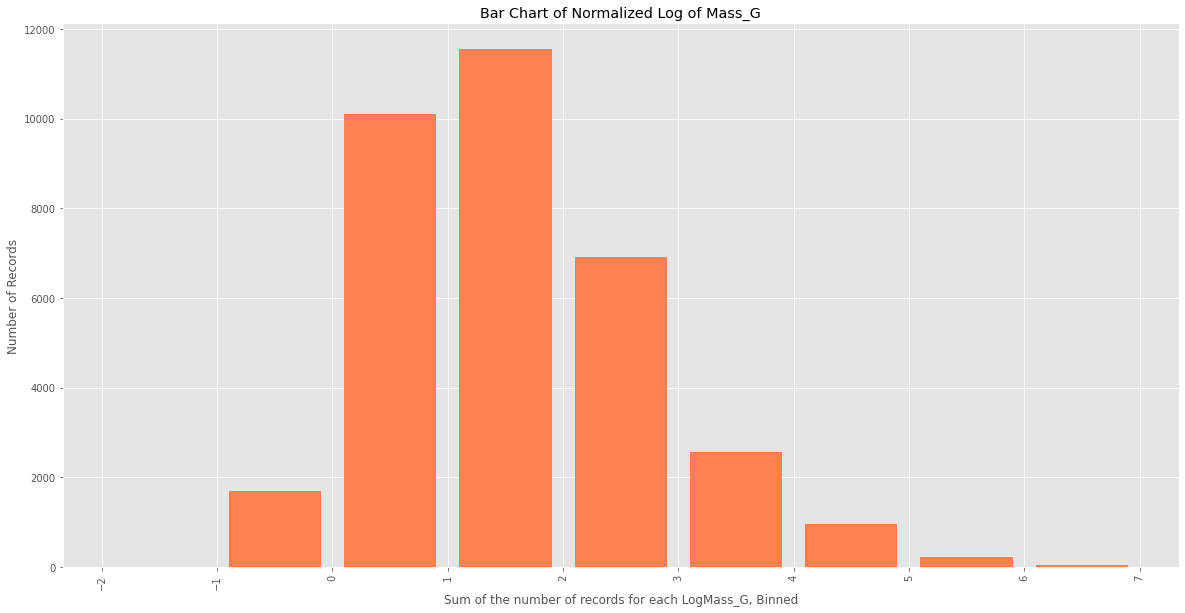

In [ ]:
#this is where I really ran into major issues, and I finally really just gave up.
# set the X-axis values, set the bins, layout the plot area, give it labels,
# and attempt to label the histogram command as a variable to pass into a function
# -- it rendered well, but it completely misses the point of including the other "NaN" data

x = df1['finalogmass_g']
bins = [-2,-1,0,1,2,3,4,5,6,7]
plt.figure(figsize = (20,10))
rects = plt.hist(df1['finalogmass_g'], bins, histtype='bar', rwidth=0.8, range=(x.min(), x.max()), color='coral')


plt.xlabel('Sum of the number of records for each LogMass_G, Binned')
plt.ylabel('Number of Records')
plt.title('Bar Chart of Normalized Log of Mass_G')
plt.xticks(np.arange(-2, 8, 1),rotation = 90)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects, "center")


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([-10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 <a list of 7 Text major ticklabel objects>)

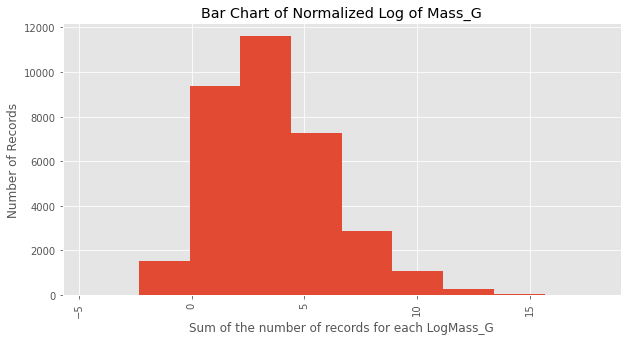

In [ ]:
# Plotting a countplot by type
# A different approach, using ggplot in Python...still didn't get it.
plt.style.use("ggplot")
plt.figure(figsize = (10,5))
plt.xlabel("Sum of the number of records for each LogMass_G")
plt.ylabel("Number of Records")
plt.title("Bar Chart of Normalized Log of Mass_G")
plt.hist(df1['finalogmass_g'])
plt.xticks(rotation = 90)
